In [1]:
import networkx as nx
import numpy as np

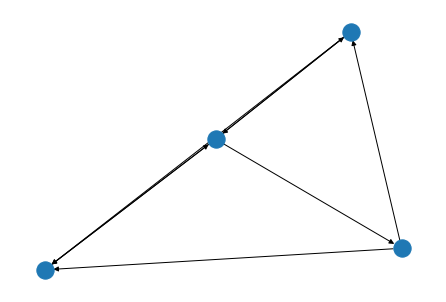

In [3]:
G = nx.DiGraph()
edges = [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 1), (4, 3), (4, 1)]
G.add_edges_from(edges)
nx.draw(G)

In [5]:
A = nx.adj_matrix(G).toarray()
print(A)

[[0 1 1 1]
 [0 0 1 1]
 [1 0 0 0]
 [1 0 1 0]]


In [6]:
D = np.sum(A, axis=1)
D

array([3, 2, 1, 2])

In [9]:
D_inv = 1 / D
D_inv = np.diag(D_inv)
D_inv

array([[0.33333333, 0.        , 0.        , 0.        ],
       [0.        , 0.5       , 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 0.        , 0.5       ]])

In [16]:
M = D_inv @ A
M = M.transpose()
print(M)

[[0.         0.         1.         0.5       ]
 [0.33333333 0.         0.         0.        ]
 [0.33333333 0.5        0.         0.5       ]
 [0.33333333 0.5        0.         0.        ]]


In [17]:
v = np.array([0.25, 0.25, 0.25, 0.25]).reshape((4, 1))
v

array([[0.25],
       [0.25],
       [0.25],
       [0.25]])

In [21]:
for ii in range(20):
    v = M @ v
print('It:',ii, v)

It: 19 [[0.38709616]
 [0.12903205]
 [0.29032302]
 [0.19354877]]


In [20]:
v = np.array([0.25, 0.25, 0.25, 0.25]).reshape((4, 1))
alpha = 0.95
M_hat = alpha * M + ((1 - alpha)/4) * np.ones((4, 4))
M_hat

array([[0.0125    , 0.0125    , 0.9625    , 0.4875    ],
       [0.32916667, 0.0125    , 0.0125    , 0.0125    ],
       [0.32916667, 0.4875    , 0.0125    , 0.4875    ],
       [0.32916667, 0.4875    , 0.0125    , 0.0125    ]])

In [23]:
for ii in range(20):
    v = M_hat @ v
print('It:',ii, v)

It: 19 [[0.3809067 ]
 [0.13312046]
 [0.28962018]
 [0.19635266]]


In [27]:
v = v.reshape((v.shape[0], ))
print(np.argsort(v))

[1 3 2 0]
